In [31]:
import torch
import pytorch_lightning as pl

device = torch.device("cuda:4" if torch.cuda.is_available() else "cpu")
torch.cuda.set_device(device)

from hydra.experimental import initialize, compose

import numpy as np
import time 
from copy import deepcopy

import matplotlib.pyplot as plt
%matplotlib inline

torch.manual_seed(184)
np.random.seed(143)

print(torch.__version__)
print(device)

1.7.1
cuda:4


In [32]:
from bliss import sleep

In [33]:
import sys
sys.path.append('./starnet_utils/')
import m2_data
import plotting
import starnet_metrics
import daophot_utils
import utils

In [34]:
%matplotlib inline

loading sdss image from ../../data/sdss/globular_clusters/2583/2/136/frame-r-002583-2-0136.fits
loading sdss image from ../../data/sdss/globular_clusters/2583/2/136/frame-i-002583-2-0136.fits


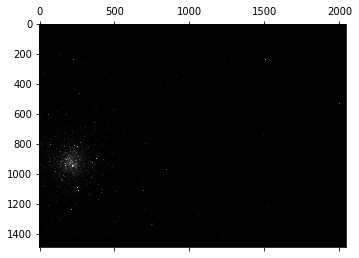

In [35]:
run = 2583
camcol = 2
field = 136

sdss_data0 = m2_data.SloanDigitalSkySurvey('../../data/sdss/globular_clusters/',
                                           run = run,
                                           camcol = camcol,
                                           field = field,
                                           # returns the r and i band
                                           bands = [2, 3])

plt.matshow(sdss_data0[0]['image'][0], 
            cmap=plt.cm.get_cmap("gray"))

loading sdss image from ../../data/sdss/globular_clusters/4646/3/81/frame-r-004646-3-0081.fits
loading sdss image from ../../data/sdss/globular_clusters/4646/3/81/frame-i-004646-3-0081.fits


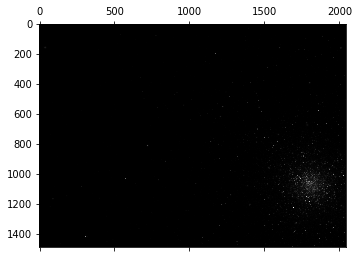

In [36]:
run = 4646
camcol = 3
field = 81

sdss_data1 = m2_data.SloanDigitalSkySurvey('../../data/sdss/globular_clusters/',
                                           run = run,
                                           camcol = camcol,
                                           field = field,
                                           # returns the r and i band
                                           bands = [2, 3])

plt.matshow(sdss_data1[0]['image'][0], 
            cmap=plt.cm.get_cmap("gray"))

loading sdss image from ../../data/sdss/globular_clusters/1458/4/700/frame-r-001458-4-0700.fits
loading sdss image from ../../data/sdss/globular_clusters/1458/4/700/frame-i-001458-4-0700.fits


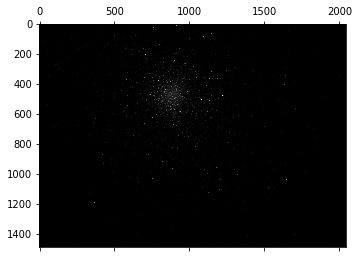

In [37]:
run = 1458
camcol = 4
field = 700

sdss_data2 = m2_data.SloanDigitalSkySurvey('../../data/sdss/globular_clusters/',
                                           run = run,
                                           camcol = camcol,
                                           field = field,
                                           # returns the r and i band
                                           bands = [2, 3])

plt.matshow(sdss_data2[0]['image'][0], 
            cmap=plt.cm.get_cmap("gray"))

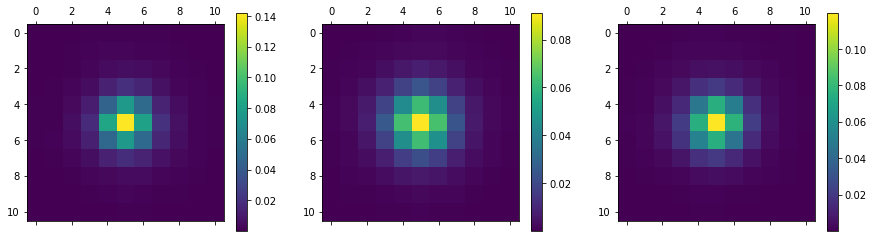

In [51]:
f, axarr = plt.subplots(1, 3, figsize=(15, 4))

x0 = 20
x1 = 31

psf0 = sdss.SdssPSF('../../data/sdss/globular_clusters/2583/2/136/psField-002583-2-0136.fit', [2])
im0 = axarr[0].matshow(psf0.psf_at_points(0, 0, 0)[x0:x1, x0:x1])
f.colorbar(im0, ax = axarr[0])


psf1 = sdss.SdssPSF('../../data/sdss/globular_clusters/4646/3/81/psField-004646-3-0081.fit', [2])
im1 = axarr[1].matshow(psf1.psf_at_points(0, 0, 0)[x0:x1, x0:x1])
f.colorbar(im1, ax = axarr[1])


psf2 = sdss.SdssPSF('../../data/sdss/globular_clusters/1458/4/700/psField-001458-4-0700.fit', [2])
im2 = axarr[2].matshow(psf2.psf_at_points(0, 0, 0)[x0:x1, x0:x1])
f.colorbar(im2, ax = axarr[2])

In [53]:
print(sdss_data0[0]['background'].mean(-1).mean(-1))
print(sdss_data1[0]['background'].mean(-1).mean(-1))
print(sdss_data2[0]['background'].mean(-1).mean(-1))

[ 686.03235 1122.9288 ]
[473.6721  853.17883]
[ 785.9786 1387.0015]
